In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the datasets
customers = pd.read_csv('Customers.csv')  # Replace with your file path
products = pd.read_csv('Products.csv')    # Replace with your file path
transactions = pd.read_csv('Transactions.csv')  # Replace with your file path

In [7]:
# Display the first few rows of each dataset
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [8]:
# Check for missing values
print("\nMissing Values in Customers Data:")
print(customers.isnull().sum())
print("\nMissing Values in Products Data:")
print(products.isnull().sum())
print("\nMissing Values in Transactions Data:")
print(transactions.isnull().sum())


Missing Values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
# Basic statistics for numerical columns
print("\nBasic Statistics for Transactions Data:")
print(transactions[['Quantity', 'TotalValue', 'Price']].describe())


Basic Statistics for Transactions Data:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [10]:
# Merge datasets for deeper analysis
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

# Analyze sales by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
print("\nSales by Region:")
print(region_sales)


Sales by Region:
          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


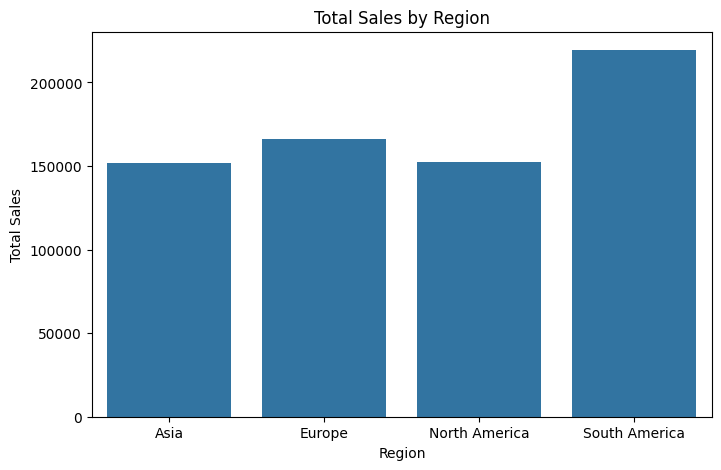

In [11]:
# Visualize sales by region
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='TotalValue', data=region_sales)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [12]:
# Analyze sales by product category
category_sales = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
print("\nSales by Product Category:")
print(category_sales)


Sales by Product Category:
      Category  TotalValue
0        Books   192147.47
1     Clothing   166170.66
2  Electronics   180783.50
3   Home Decor   150893.93


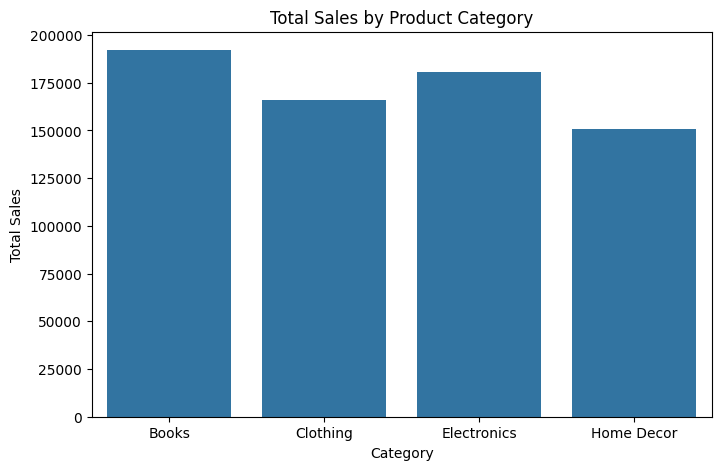

In [13]:
# Visualize sales by product category
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='TotalValue', data=category_sales)
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

In [14]:
# Analyze customer signups over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signups_over_time = customers.resample('M', on='SignupDate').size().reset_index(name='Signups')
print("\nCustomer Signups Over Time:")
print(signups_over_time)

/tmp/ipykernel_10929/2220771250.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  signups_over_time = customers.resample('M', on='SignupDate').size().reset_index(name='Signups')



Customer Signups Over Time:
   SignupDate  Signups
0  2022-01-31        1
1  2022-02-28        7
2  2022-03-31        8
3  2022-04-30        8
4  2022-05-31        8
5  2022-06-30        5
6  2022-07-31        4
7  2022-08-31        4
8  2022-09-30        6
9  2022-10-31        3
10 2022-11-30        3
11 2022-12-31        7
12 2023-01-31        5
13 2023-02-28        6
14 2023-03-31        8
15 2023-04-30        6
16 2023-05-31        3
17 2023-06-30        3
18 2023-07-31        3
19 2023-08-31        2
20 2023-09-30        4
21 2023-10-31        7
22 2023-11-30        5
23 2023-12-31        5
24 2024-01-31        9
25 2024-02-29        8
26 2024-03-31        4
27 2024-04-30       10
28 2024-05-31        6
29 2024-06-30        4
30 2024-07-31        6
31 2024-08-31        4
32 2024-09-30       11
33 2024-10-31        5
34 2024-11-30       11
35 2024-12-31        1


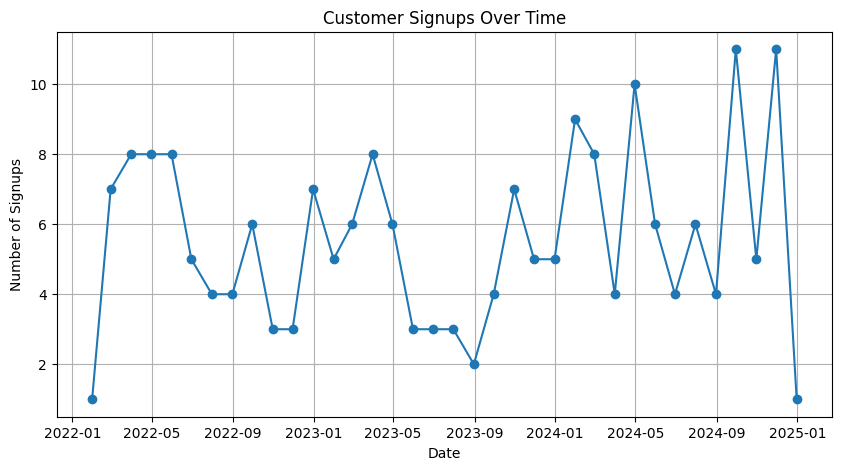

In [15]:
# Visualize customer signups over time
plt.figure(figsize=(10, 5))
plt.plot(signups_over_time['SignupDate'], signups_over_time['Signups'], marker='o')
plt.title('Customer Signups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()